In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlflow.tracking import MlflowClient
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import mlflow
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('data/telecom_customer_churn_clean.csv')
df.head(20)

,Gender,Age,Married,Number of Dependents,City_0,City_1,City_2,City_3,City_4,City_5,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status
0,0,37,1,0,0,0,0,0,0,0,...,1,0,0,1,2,593.30,0.00,0,381.51,0
1,1,46,0,0,0,0,0,0,0,0,...,0,1,1,0,1,542.40,38.33,10,96.21,0
2,1,50,0,0,0,0,0,0,0,0,...,0,0,0,1,1,280.85,0.00,0,134.60,1
3,1,78,1,0,0,0,0,0,0,0,...,1,1,0,1,1,1237.85,0.00,0,361.66,1
4,0,75,1,0,0,0,0,0,0,0,...,1,0,0,1,1,267.40,0.00,0,22.14,1
5,0,23,0,3,0,0,0,0,0,0,...,1,1,1,1,1,571.45,0.00,0,150.93,0
6,0,67,1,0,0,0,0,0,0,0,...,1,1,1,1,3,7904.25,0.00,0,707.16,0
7,1,52,1,0,0,0,0,0,0,0,...,0,0,0,0,3,5377.80,0.00,20,816.48,0
8,0,68,0,0,0,0,0,0,0,0,...,0,0,0,1,3,340.35,0.00,0,73.71,0
9,0,43,1,1,0,0,0,0,0,0,...,1,1,1,1,3,5957.90,0.00,0,1849.90,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       7043 non-null   int64  
 1   Age                          7043 non-null   int64  
 2   Married                      7043 non-null   int64  
 3   Number of Dependents         7043 non-null   int64  
 4   City_0                       7043 non-null   int64  
 5   City_1                       7043 non-null   int64  
 6   City_2                       7043 non-null   int64  
 7   City_3                       7043 non-null   int64  
 8   City_4                       7043 non-null   int64  
 9   City_5                       7043 non-null   int64  
 10  City_6                       7043 non-null   int64  
 11  City_7                       7043 non-null   int64  
 12  City_8                       7043 non-null   int64  
 13  City_9            

In [4]:
# encoder = LabelEncoder()
# df['City'] = encoder.fit_transform(df['City'])
# df['State'] = encoder.fit_transform(df['State'])
# df['Country'] = encoder.fit_transform(df['Country'])
# df['Gender'] = encoder.fit_transform(df['Gender'])

In [5]:
X = df.drop("Customer Status", axis=1)
y = df["Customer Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# X_train.shape, X_test.shape

In [6]:
X

,Gender,Age,Married,Number of Dependents,City_0,City_1,City_2,City_3,City_4,City_5,...,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges
0,0,37,1,0,0,0,0,0,0,0,...,1,1,0,0,1,2,593.30,0.00,0,381.51
1,1,46,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,542.40,38.33,10,96.21
2,1,50,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,280.85,0.00,0,134.60
3,1,78,1,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1237.85,0.00,0,361.66
4,0,75,1,0,0,0,0,0,0,0,...,1,1,0,0,1,1,267.40,0.00,0,22.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,20,0,0,0,0,0,0,0,0,...,1,0,0,1,1,2,742.90,0.00,0,606.84
7039,1,40,1,0,0,1,0,0,1,1,...,0,0,1,1,1,1,1873.70,0.00,0,356.40
7040,1,22,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,92.75,0.00,0,37.24
7041,1,21,1,0,1,0,0,0,0,1,...,1,0,1,1,1,3,4627.65,0.00,0,142.04


# Random  Forest

In [7]:
import mlflow
from mlflow.tracking import MlflowClient
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Depi_RF")
client = MlflowClient()
model_name = "RF"
alias_name = "dev"

with mlflow.start_run(run_name=f"Run for @{alias_name}") as run:

    rf = RandomForestClassifier(
        random_state=30,
        class_weight="balanced"  
    )

    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(rf, artifact_path="model")

    model_uri = f"runs:/{run.info.run_id}/model"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version

    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Model version: {version}")
    print(f"Alias @{alias_name} → version {version}")


2025/12/10 04:32:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 04:32:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RF' already exists. Creating a new version of this model...
2025/12/10 04:32:59 WARNING mlflow.tracking._model_registry.fluent: Run with id 2eecf62259d64eb8becb5c23c5d7f827 has no artifacts at artifact path 'model', registering model based on models:/m-add7a1b9751e4755bcd333d472ce83b7 instead
2025/12/10 04:32:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RF, version 11
Created version '11' of model 'RF'.


Accuracy: 0.8320
Precision: 0.8255
Recall: 0.8320
F1 Score: 0.8265
Model version: 11
Alias @dev → version 11
🏃 View run Run for @dev at: http://127.0.0.1:5000/#/experiments/416889385097028402/runs/2eecf62259d64eb8becb5c23c5d7f827
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/416889385097028402


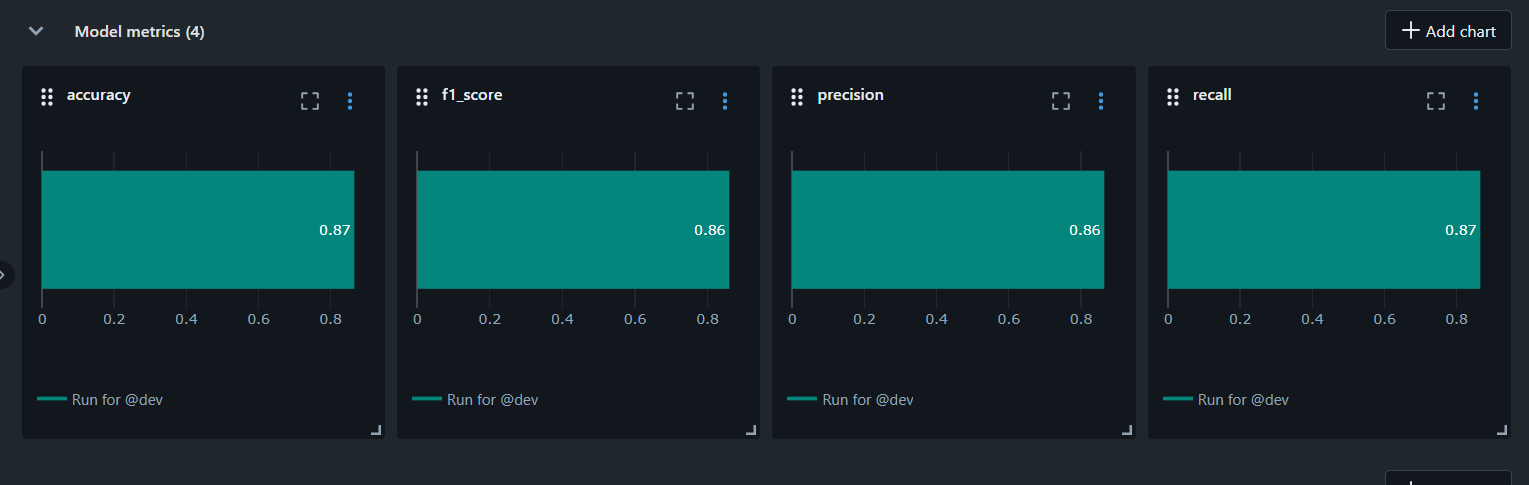

# Random Forest grid search   

In [11]:
import mlflow
from mlflow.tracking import MlflowClient
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Depi_RF")
client = MlflowClient()
model_name = "RF"
alias_name = "dev"


with mlflow.start_run(run_name=f"Run for @{alias_name}") as run:

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=30, class_weight="balanced"))
    ])

    param_grid = {
        "rf__n_estimators": [200, 300, 400, 500],
        "rf__max_depth": [10, 20, 30, None],
        "rf__min_samples_split": [2, 5, 10],
        "rf__min_samples_leaf": [1, 2, 4],
        "rf__max_features": ["sqrt", "log2"],
        'scaler': [StandardScaler(), 'passthrough']
        }
    # rf = RandomForestClassifier(
    #     random_state=30,
    #     class_weight="balanced" 
    # )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=3,
        scoring="f1_weighted",
        n_jobs=-1,
        verbose=1,
        refit=True
        )

    grid.fit(X_train, y_train)
    best_pipeline = grid.best_estimator_
    y_pred = best_pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")


    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("best_cv_score", grid.best_score_)
    mlflow.log_params(grid.best_params_)

    mlflow.sklearn.log_model(best_pipeline, artifact_path="model")

    joblib.dump(best_pipeline, 'rf_gscv_pipeline.pkl')

    model_uri = f"runs:/{run.info.run_id}/model"
    result = mlflow.register_model(model_uri=model_uri, name=model_name)
    version = result.version

    client.set_registered_model_alias(
        name=model_name,
        alias=alias_name,
        version=version
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Best CV Score (F1): {grid.best_score_:.4f}")
    print(f"Best Params: {grid.best_params_}")
    print(f"Model version: {version}")
    print(f"Alias @{alias_name} → version {version}")


Fitting 3 folds for each of 576 candidates, totalling 1728 fits


2025/12/10 04:52:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/10 04:52:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RF' already exists. Creating a new version of this model...
2025/12/10 04:52:25 WARNING mlflow.tracking._model_registry.fluent: Run with id 045f503ff0a442f6a136424a0bc9c27b has no artifacts at artifact path 'model', registering model based on models:/m-6768dc66916e4a89923634a83b568407 instead
2025/12/10 04:52:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RF, version 12
Created version '12' of model 'RF'.


Accuracy: 0.8268
Precision: 0.8293
Recall: 0.8268
F1 Score: 0.8279
Best CV Score (F1): 0.8408
Best Params: {'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200, 'scaler': 'passthrough'}
Model version: 12
Alias @dev → version 12
🏃 View run Run for @dev at: http://127.0.0.1:5000/#/experiments/416889385097028402/runs/045f503ff0a442f6a136424a0bc9c27b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/416889385097028402


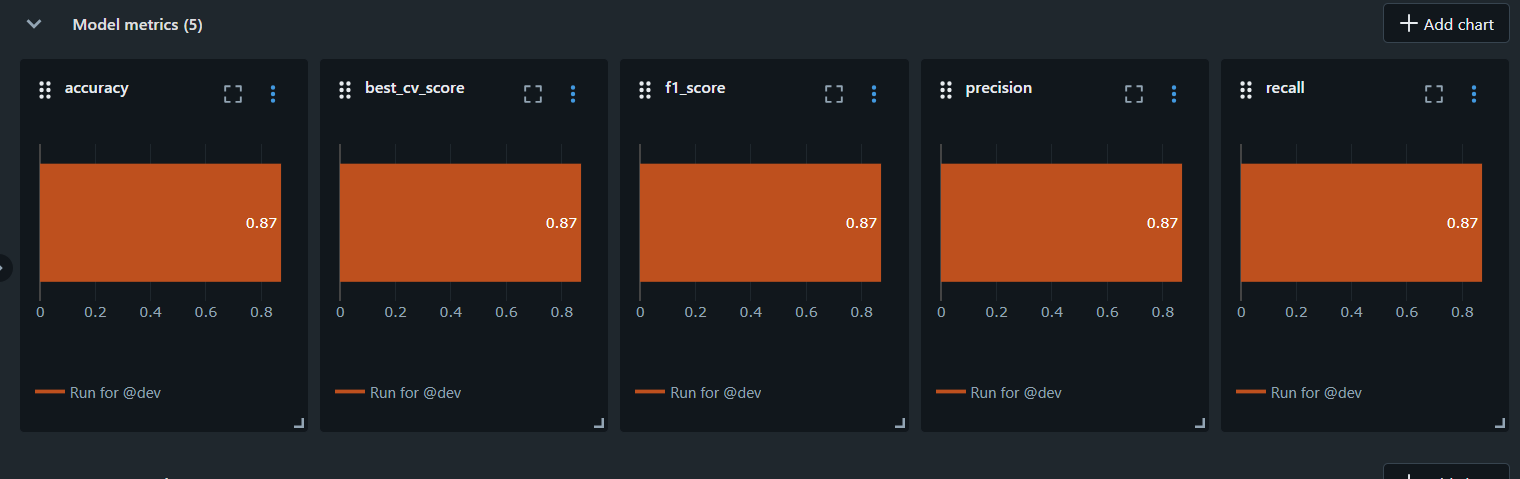

- Saving best model: RF with GridSearch to be deployed using Streamlit

In [ ]:
# import joblib
# model_filename = 'rf_gscv_model.pkl'
# joblib.dump(best_model, model_filename)
# print(f"Model saved to {model_filename}")

- Saving scaler object

In [ ]:
# scaler_filename = 'scaler.pkl'
# joblib.dump(scaler, scaler_filename)